In [56]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [57]:
df = pd.read_csv("C:/Users/HP/Downloads/Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [58]:
df.drop('CustomerID', axis=1, inplace=True)
df['Gender'] = LabelEncoder().fit_transform(df['Gender'])# Male=1, Female=0

In [59]:
df['ScoreCategory'] = pd.cut(df['Spending Score (1-100)'],
                            bins=[-1, 40, 70, 100],
                            labels=[0, 1, 2]).astype(int)

In [60]:
X = df.drop(['Spending Score (1-100)', 'ScoreCategory'], axis=1)
y = df['ScoreCategory']

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [62]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [63]:
mlp = MLPClassifier(hidden_layer_sizes=(16, 12), max_iter=500, random_state=42)
mlp.fit(X_train, y_train)

C:\Users\HP\AppData\Roaming\Python\Python313\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(16, 12), max_iter=500, random_state=42)

In [64]:
y_pred = mlp.predict(X_test)

In [65]:
cm = confusion_matrix(y_test, y_pred)
print("Classification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.56      0.72        16
           1       0.85      0.94      0.89        18
           2       0.55      1.00      0.71         6

    accuracy                           0.80        40
   macro avg       0.80      0.84      0.77        40
weighted avg       0.86      0.80      0.80        40



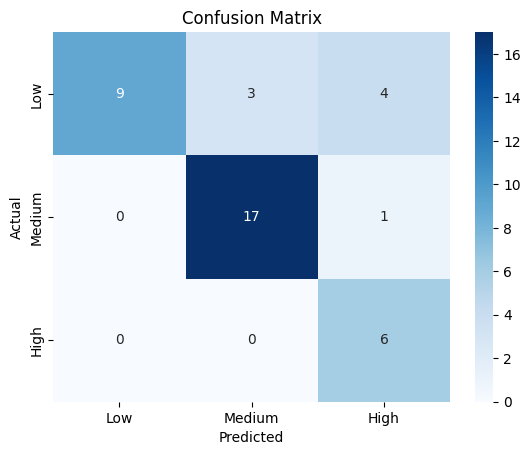

In [66]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Low', 'Medium', 'High'],
            yticklabels=['Low', 'Medium', 'High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()